### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Importing dataset

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Making the copy of dataset for further use

In [4]:
dt=df.copy()

### Correlation to check how strongly the dependent variable is dependent on independent variables.


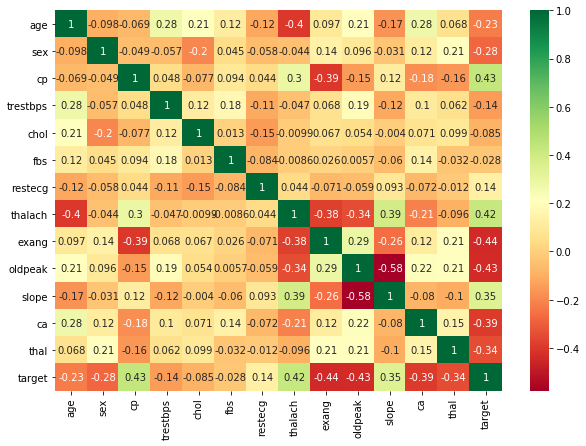

In [5]:
cor=dt.corr()
top_features=cor.index
plt.figure(figsize=(10,7))
g=sns.heatmap(dt[top_features].corr(),annot=True,cmap="RdYlGn")

### Let's check more about the dataset and also for the null values

In [6]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Changing the name of the columns to make the dataset more clear

In [8]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

### Changing the categorical variables from One Hot encoded from to normal form to understand the data

In [9]:
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

D:\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\conda\lib\site-packages\ipyke

In [10]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [11]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


   ### Looking at the above dataframe, the dataset look more neat and clear

### Now, let's make dummy variables to deal with categorical variables  

In [12]:
data=pd.get_dummies(dt,drop_first=True)
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


### Scaling the integral data to make it balanced

In [13]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
columns_to_scale=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']
data[columns_to_scale]=standardscaler.fit_transform(data[columns_to_scale])
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


In [14]:
x=data.drop(['target'],axis=1)
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)



### Initially Fitting the model to do more EDA

In [15]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier=RandomForestClassifier(n_estimators=10)
randomforest_classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_predict=randomforest_classifier.predict(x_test)
y_pred_bin = randomforest_classifier.predict(x_test)

### Confusion matrix to know the Sensitivity and specificity

In [17]:
from sklearn.metrics import confusion_matrix 
confusion_matrix=confusion_matrix(y_test,y_predict)
confusion_matrix

array([[38, 12],
       [ 8, 33]], dtype=int64)

In [18]:
sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8260869565217391
Specificity :  0.7333333333333333


In [19]:
y_predict_prob=randomforest_classifier.predict_proba(x_test)[:,1]

### ROC curve using Sensitivity and specificity to get AUC

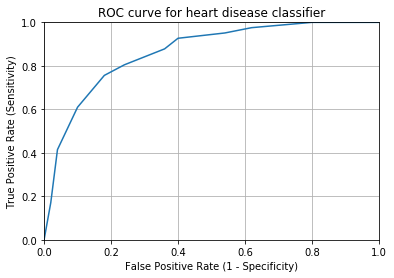

In [20]:
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report

fpr, tpr, thresholds= roc_curve(y_test,y_predict_prob)
plt.plot(fpr, tpr)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [21]:
auc(fpr,tpr)

0.8631707317073171

### Permutation Importance grid to find the most important features

In [22]:
import eli5
from eli5.sklearn import PermutationImportance
perm=PermutationImportance(randomforest_classifier,random_state=1)
perm.fit(x_test,y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

D:\conda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\conda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0330 ± 0.0241,st_depression
0.0220 ± 0.0606,num_major_vessels
0.0198 ± 0.0256,thalassemia_fixed defect
0.0088 ± 0.0164,chest_pain_type_non-anginal pain
0.0088 ± 0.0292,exercise_induced_angina_yes
0.0066 ± 0.0298,sex_male
0.0044 ± 0.0224,chest_pain_type_typical angina
0.0000 ± 0.0393,max_heart_rate_achieved
0.0000 ± 0.0197,chest_pain_type_atypical angina
0.0000 ± 0.0139,thalassemia_reversable defect


### Performing some more feature selection on integral variables

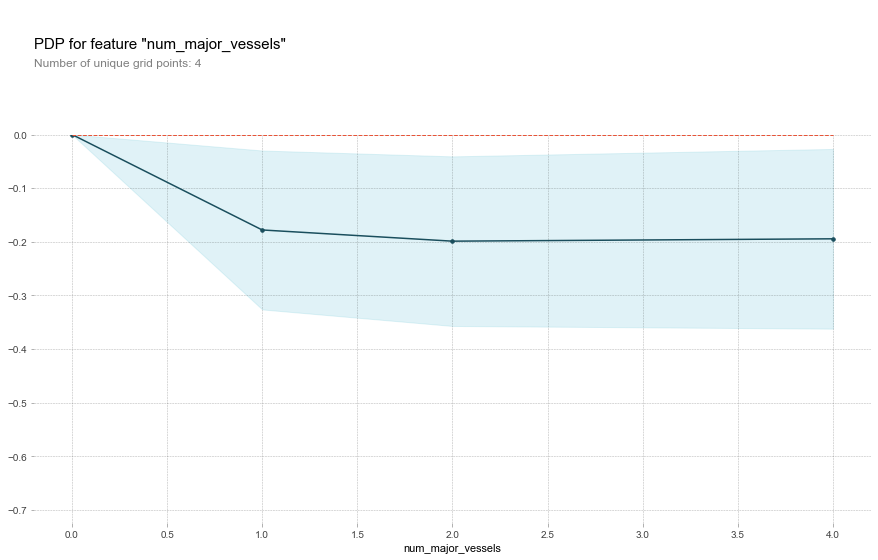

In [23]:
from pdpbox import pdp, info_plots

base_features = data.columns.values.tolist()
base_features.remove('target')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=randomforest_classifier, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### The above plot shows that by increasing the number of major vessels , the probablity of getting Heart disease decreses

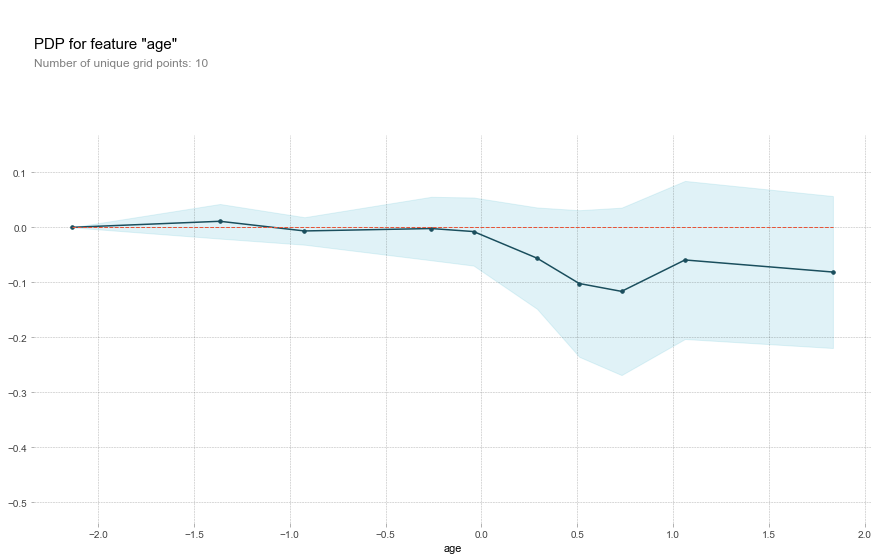

In [24]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=randomforest_classifier, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### The above plot shows that the with the increase in Age the probability of getting Heart disease gets lower. Hence, this is opposite to what we analysed while checking it on the web  

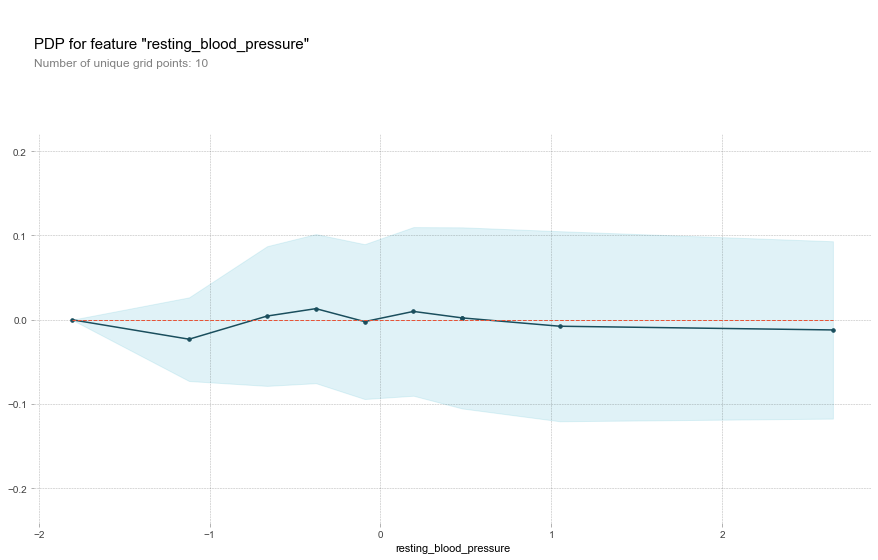

In [25]:
feat_name = 'resting_blood_pressure'
pdp_dist = pdp.pdp_isolate(model=randomforest_classifier, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### The above plot states that by the increase in resting BP the probability of getting a Heart Disease increases and which is the fact too.

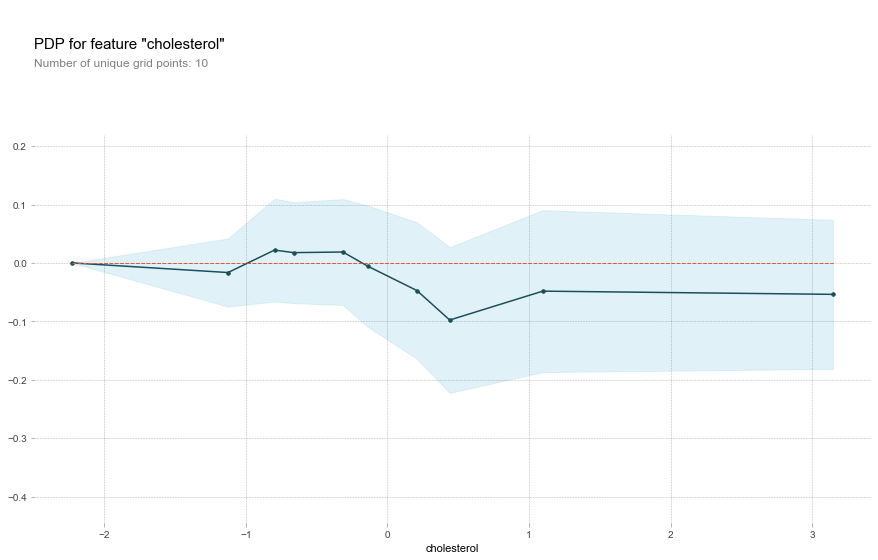

In [26]:
feat_name = 'cholesterol'
pdp_dist = pdp.pdp_isolate(model=randomforest_classifier, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### The above plot contradicts our research

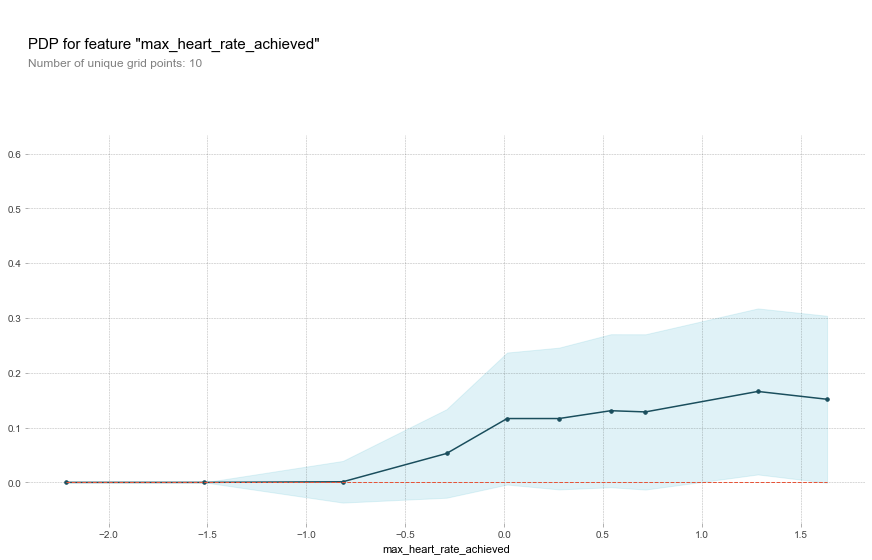

In [27]:
feat_name = 'max_heart_rate_achieved'
pdp_dist = pdp.pdp_isolate(model=randomforest_classifier, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### The above plot states that maximum heart rate achieved is more than the probability of getting heart disease is higher and this is a fact too.


### Jumping towards the Categorical data

In [28]:
dt.groupby(['sex'])['target'].value_counts()

sex     target
female  1          72
        0          24
male    0         114
        1          93
Name: target, dtype: int64

#### This shows that Males are equally likely to get heart disease whereas, Females are more likely to get heart disease

In [29]:
dt.groupby(['chest_pain_type'])['target'].value_counts()

chest_pain_type   target
0                 0         104
                  1          39
atypical angina   1          69
                  0          18
non-anginal pain  1          16
                  0           7
typical angina    1          41
                  0           9
Name: target, dtype: int64

#### This shows having  asymptomatic chest pain defines no heart disease while having any other type of chest pain is more likely to get heart disease

In [30]:
dt.groupby(['fasting_blood_sugar'])['target'].value_counts()

fasting_blood_sugar    target
greater than 120mg/ml  1          23
                       0          22
lower than 120mg/ml    1         142
                       0         116
Name: target, dtype: int64

#### This shows that this variable is not that important to consider for predictions. so we will drop this in further processes

In [31]:
dt.groupby(['rest_ecg'])['target'].value_counts()

rest_ecg                      target
ST-T wave abnormality         1         96
                              0         56
left ventricular hypertrophy  0          3
                              1          1
normal                        0         79
                              1         68
Name: target, dtype: int64

#### This shows that this variable is not that important to consider for predictions. so we will drop this in further processes

In [32]:
dt.groupby(['exercise_induced_angina'])['target'].value_counts()

exercise_induced_angina  target
no                       1         142
                         0          62
yes                      0          76
                         1          23
Name: target, dtype: int64

####  Still having Angina after exercise means more likely to get heart disease

In [33]:
dt.groupby(['st_slope'])['target'].value_counts()

st_slope   target
0          0          12
           1           9
flat       1         107
           0          35
upsloping  0          91
           1          49
Name: target, dtype: int64

#### Patients having ECG slope flat then they are more likely to get heart disease other than the once with uppsloping slope or downsloping

In [34]:
dt.groupby(['thalassemia'])['target'].value_counts()

thalassemia        target
0                  0           1
                   1           1
fixed defect       1         130
                   0          36
normal             0          12
                   1           6
reversable defect  0          89
                   1          28
Name: target, dtype: int64

#### This variable is not giving much information whether the patient is more likely to get the heart disease in any of the particular case

In [35]:
final=dt.copy()

In [36]:
final.drop(['fasting_blood_sugar','rest_ecg','st_depression','cholesterol','resting_blood_pressure','thalassemia'],axis=1,inplace=True)
final.head()

,age,sex,chest_pain_type,max_heart_rate_achieved,exercise_induced_angina,st_slope,num_major_vessels,target
0,63,male,non-anginal pain,150,no,0,0,1
1,37,male,atypical angina,187,no,0,0,1
2,41,female,typical angina,172,no,flat,0,1
3,56,male,typical angina,178,no,flat,0,1
4,57,female,0,163,yes,flat,0,1


In [40]:
final1=pd.get_dummies(final,drop_first=True)
final1.head()

,age,max_heart_rate_achieved,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping
0,63,150,0,1,1,0,1,0,0,0,0
1,37,187,0,1,1,1,0,0,0,0,0
2,41,172,0,1,0,0,0,1,0,1,0
3,56,178,0,1,1,0,0,1,0,1,0
4,57,163,0,1,0,0,0,0,1,1,0


In [42]:
X=final1.drop(['target'],axis=1)
Y=final1.target

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [59]:
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
Y_predict=model.predict(X_test)
Y_pred_bin = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix 
Confusion_matrix=confusion_matrix(Y_test,Y_predict)
Confusion_matrix

array([[32,  9],
       [13, 37]], dtype=int64)

In [62]:
Sensitivity = Confusion_matrix[0,0]/(Confusion_matrix[0,0]+Confusion_matrix[1,0])
print('Sensitivity : ', Sensitivity )

Specificity = Confusion_matrix[1,1]/(Confusion_matrix[1,1]+Confusion_matrix[0,1])
print('Specificity : ', Specificity)

Sensitivity :  0.7111111111111111
Specificity :  0.8043478260869565


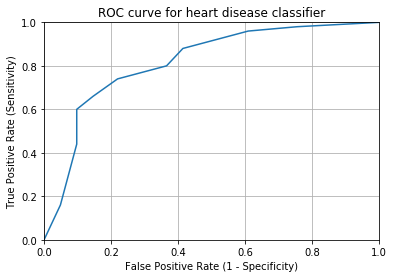

In [63]:
Y_predict_prob=model.predict_proba(X_test)[:,1]


from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report

Fpr, Tpr, Thresholds= roc_curve(Y_test,Y_predict_prob)
plt.plot(Fpr, Tpr)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [64]:
auc(Fpr,Tpr)

0.8170731707317073